<a href="https://colab.research.google.com/github/Anshu366651/capstone/blob/main/Copy_of_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
%pip install wordcloud

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset-SA.csv", encoding="unicode_escape")
print(f"Dataset shape : {data.shape}")

Dataset shape : (205052, 6)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(f"Feature names : {data.columns.values}")

Feature names : ['product_name' 'product_price' 'Rate' 'Review' 'Summary' 'Sentiment']


In [ ]:
data.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [ ]:
data.dropna(inplace=True)
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (180379, 6)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180379 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   180379 non-null  object
 1   product_price  180379 non-null  object
 2   Rate           180379 non-null  object
 3   Review         180379 non-null  object
 4   Summary        180379 non-null  object
 5   Sentiment      180379 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [ ]:
review = data['Review'].unique() # Wrap 'Review' in quotes to reference the column

In [ ]:
data['Review'].unique()

array(['super!', 'awesome', 'fair', ..., 'good quality dinner set',
       'good quality product and good option for some one gift.',
       'product looking very nice & strong quality'], dtype=object)

In [ ]:
for review in data['Review'] [0:10]:
  print(review)

super!
awesome
fair
useless product
fair
awesome
highly recommended
nice
unsatisfactory
worth the money


In [ ]:
data.dtypes

product_name     object
product_price    object
Rate             object
Review           object
Summary          object
Sentiment        object
dtype: object

In [ ]:

data.head()


,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Rate').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Summary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Review'].value_counts()
    for x_label, grp in _df_4.groupby('Rate')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Rate')
_ = plt.ylabel('Review')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Summary'].value_counts()
    for x_label, grp in _df_5.groupby('Review')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Review')
_ = plt.ylabel('Summary')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sentiment'].value_counts()
    for x_label, grp in _df_6.groupby('Summary')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Summary')
_ = plt.ylabel('Sentiment')

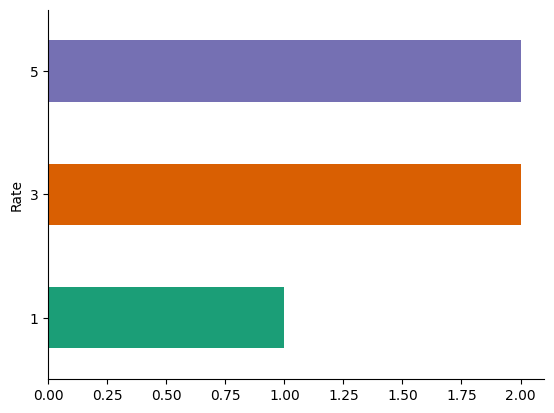

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Rate').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

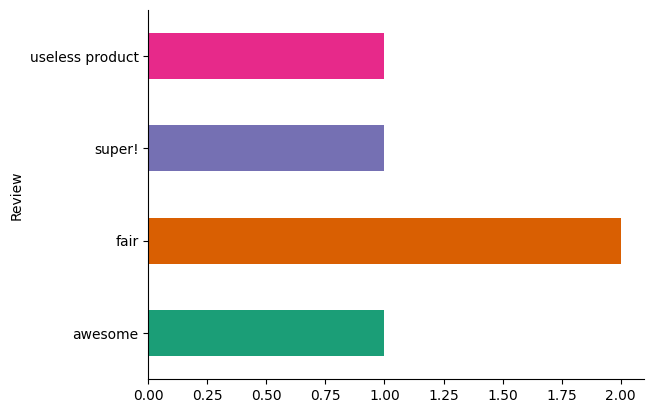

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

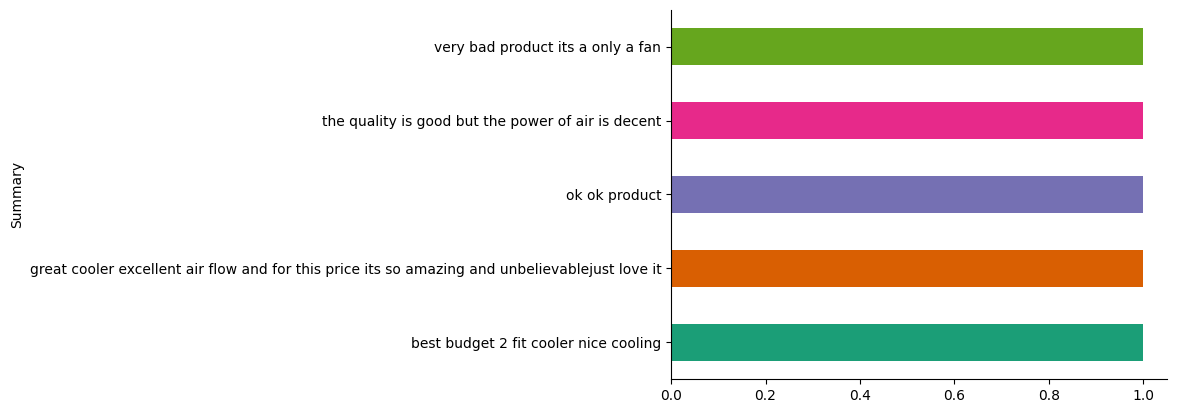

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Summary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

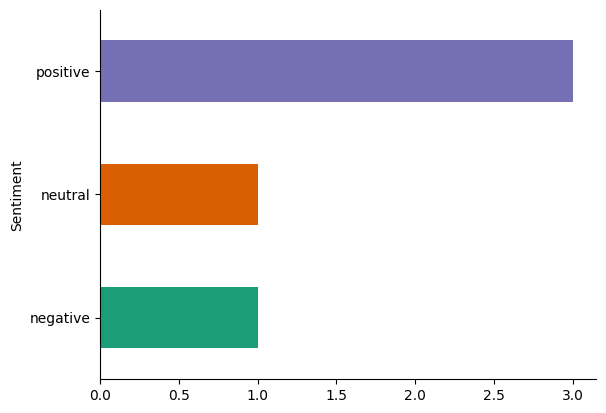

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data = data.drop_duplicates()
print(f"Dataset shape after dropping duplicates : {data.shape}")

Dataset shape after dropping duplicates : (154467, 6)


### Relation between Rate and Review

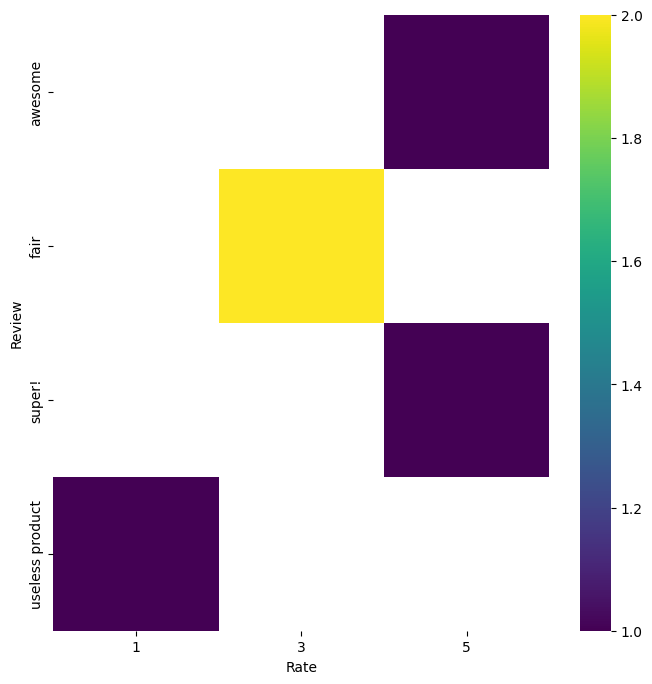

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Review'].value_counts()
    for x_label, grp in _df_4.groupby('Rate')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Rate')
_ = plt.ylabel('Review')

### Reltion between Review and Summary

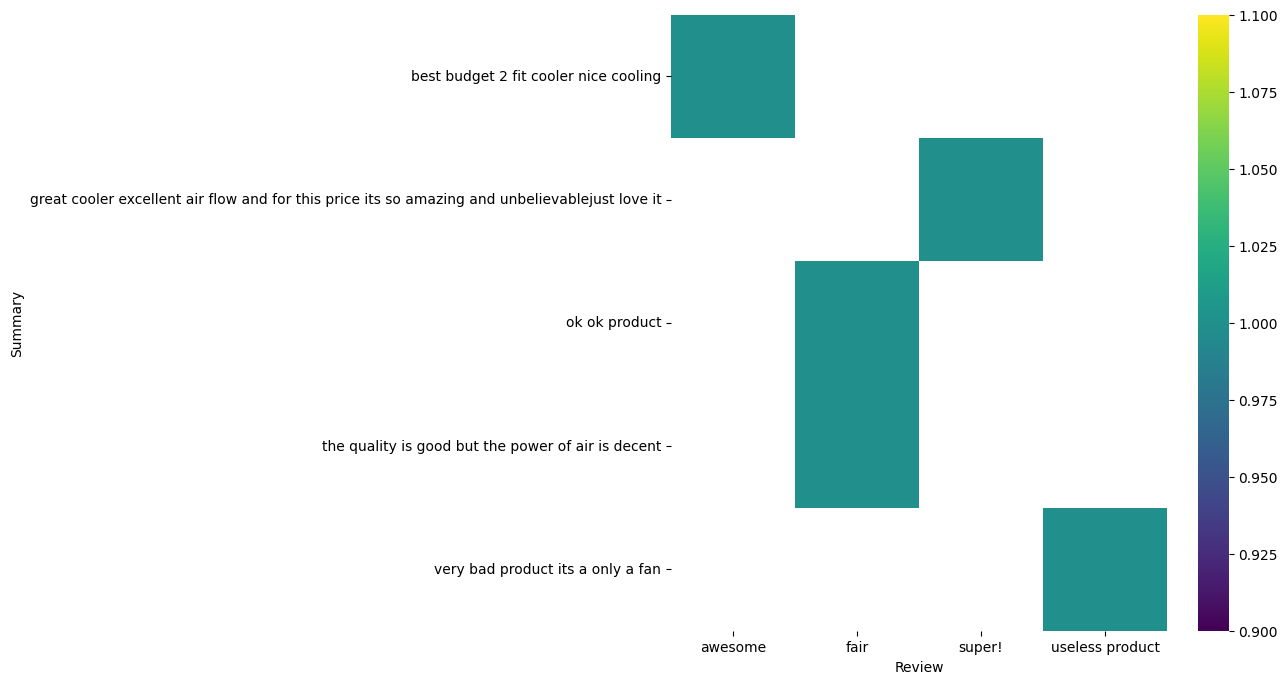

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Summary'].value_counts()
    for x_label, grp in _df_5.groupby('Review')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Review')
_ = plt.ylabel('Summary')

### Relation between Summary and Sentiment

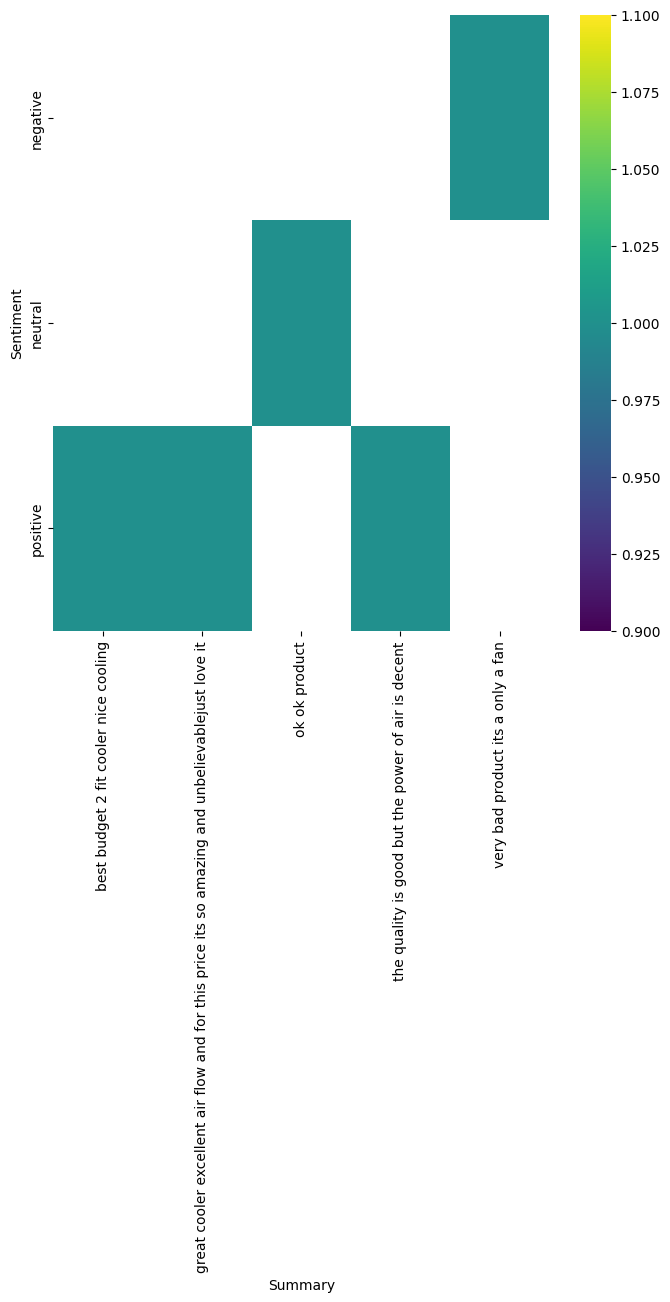

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sentiment'].value_counts()
    for x_label, grp in _df_6.groupby('Summary')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Summary')
_ = plt.ylabel('Sentiment')

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.Review)

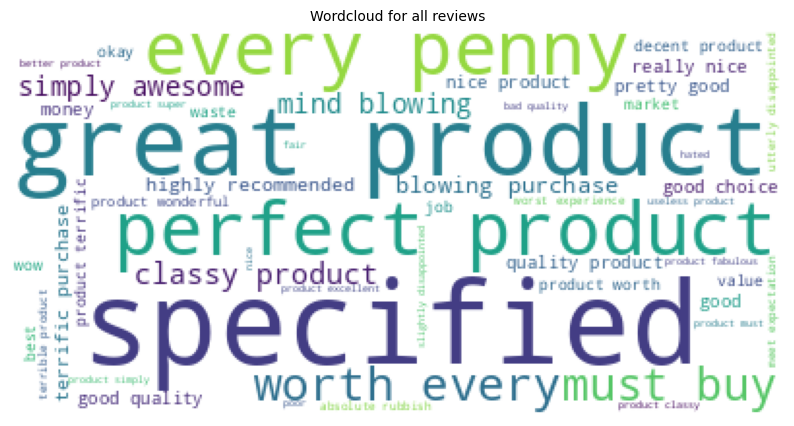

In [ ]:
#Combine all Reviews
reviews = " ".join([review for review in data['Review']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
neg_reviews = " ".join([review for review in data[data['Sentiment'] == 'negative']['Review']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['Sentiment'] == 'positive']['Review']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that Sentiment category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

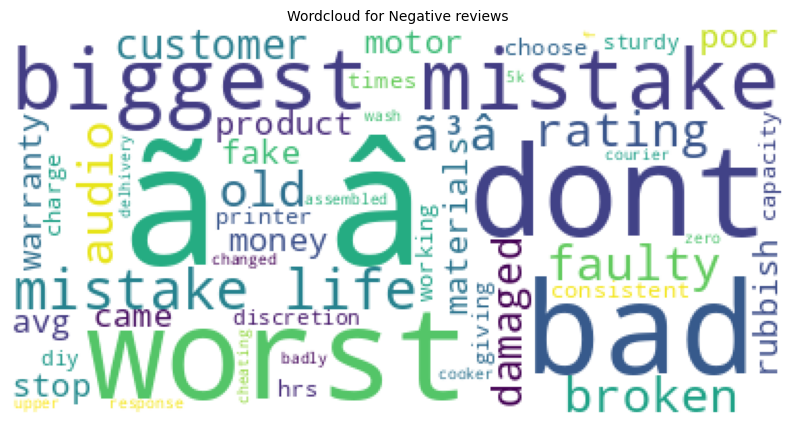

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for Negative reviews', fontsize=10)
plt.axis('off')
plt.show()

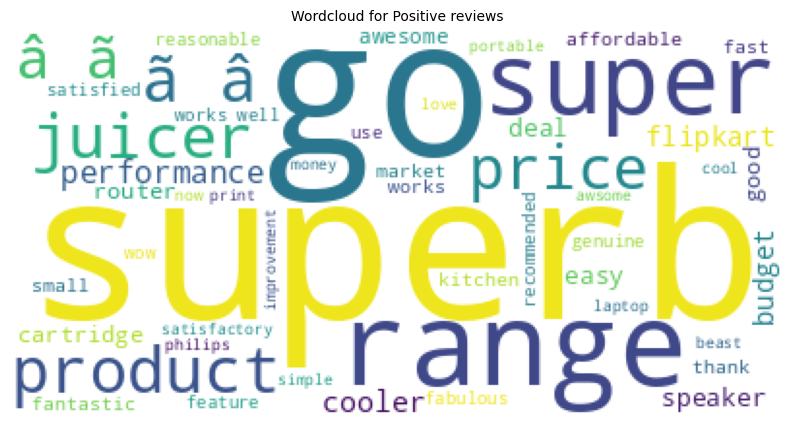

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for Positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
len(data)

154467

In [ ]:
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# Download the stop words corpus
nltk.download('stopwords')

stops = set(stopwords.words('english')) #english stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer

# This function was likely overwritten, redefining it here
def review_to_words(raw_review):
    # Handle potential float values by converting them to strings
    if isinstance(raw_review, float):
        raw_review = str(raw_review)

    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  # Apply the review_to_words function to get processed text
  processed_review = review_to_words(data.iloc[i]['Review'])
  # Now apply the regex and stemming to the processed text
  review = re.sub('[^a-zA-Z]', ' ', processed_review)
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-25-ad85ec72ebe8>:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [ ]:
import os
import pickle

# Create the 'Models' directory if it doesn't exist
os.makedirs('Models', exist_ok=True)

# Now you can safely save the CountVectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [ ]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['Sentiment'].values

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (154467, 1019)
y shape: (154467,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (108126, 1019)
y train: (108126,)
X test: (46341, 1019)
y test: (46341,)


In [ ]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 3
X test max value: 2


In [ ]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [ ]:
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9009211475500805
Testing Accuracy : 0.900843745279558


In [ ]:
y_preds = model_rf.predict(X_test_scl)

In [ ]:
cm = confusion_matrix(y_test, y_preds)

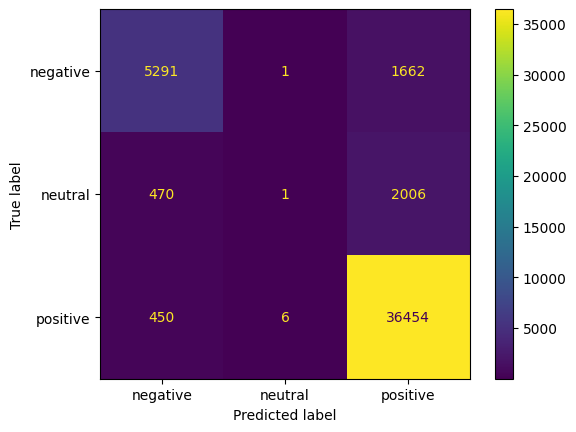

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()


Training Accuracy : 0.9013053013198676
Testing Accuracy : 0.8996892600504952


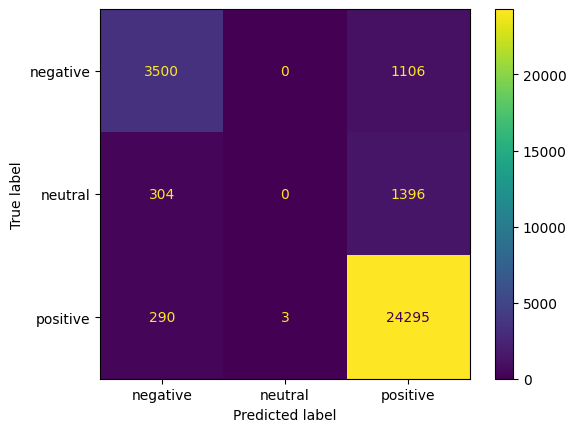

Training Accuracy : 0.9021954634102919
Testing Accuracy : 0.895934485660646


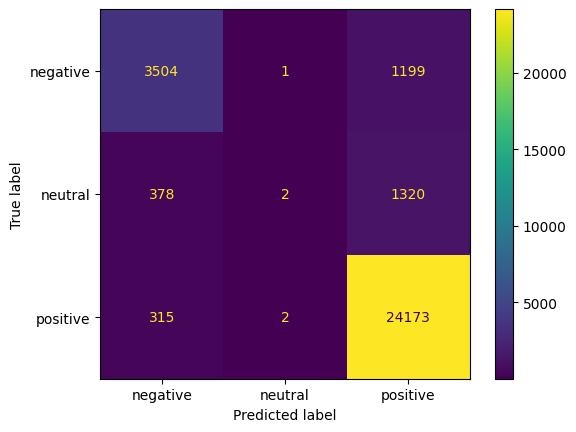

Training Accuracy : 0.9009662226681988
Testing Accuracy : 0.9006571067879455


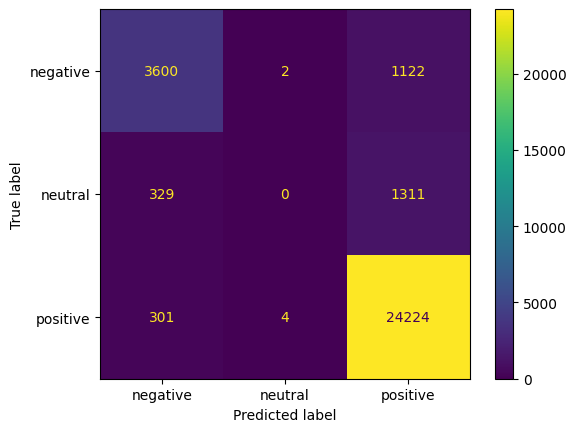

Training Accuracy : 0.9011199766941266
Testing Accuracy : 0.900527627617907


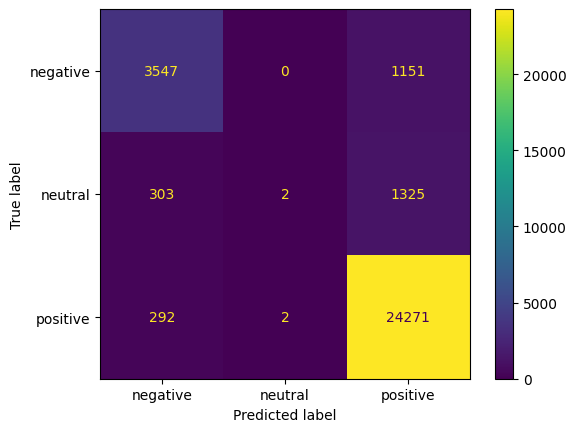

Training Accuracy : 0.9006344376648809
Testing Accuracy : 0.9020490078658596


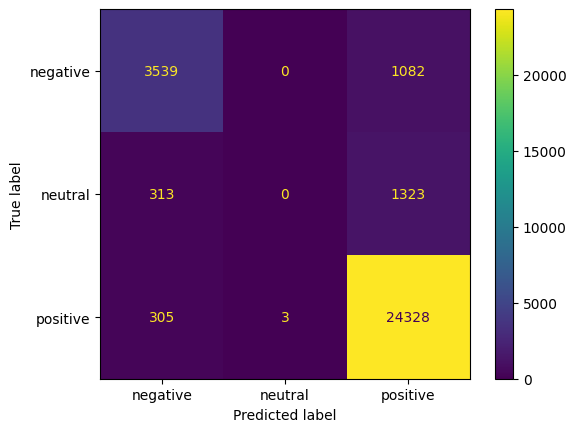

In [ ]:
# K fold cross-validation

from sklearn.model_selection import KFold
# Assuming X is your original feature data that needs to be scaled
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scl = scaler.fit_transform(X) # Scale the data

kfold = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kfold.split(X_scl):
  X_train, X_test = X_scl[train_index], X_scl[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model_rf.fit(X_train, y_train)
  print("Training Accuracy :", model_rf.score(X_train, y_train))
  print("Testing Accuracy :", model_rf.score(X_test, y_test))
  y_preds = model_rf.predict(X_test)
  cm = confusion_matrix(y_test, y_preds)
  cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
  cm_display.plot()
  plt.show()

In [ ]:
from sklearn.metrics import classification_report
cr = (classification_report(y_test, y_preds))
print(cr)

              precision    recall  f1-score   support

    negative       0.85      0.76      0.80      6954
     neutral       0.12      0.00      0.00      2477
    positive       0.91      0.99      0.95     36910

    accuracy                           0.90     46341
   macro avg       0.63      0.58      0.58     46341
weighted avg       0.86      0.90      0.87     46341



In [ ]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 5291     1  1662]
 [  470     1  2006]
 [  450     6 36454]]


In [ ]:
from flask import Flask, request, jsonify, send_file, render_template
import re
from io import BytesIO

# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import base64

STOPWORDS = set(stopwords.words("english"))

app = Flask(__name__)


@app.route("/test", methods=["GET"])
def test():
    return "Test request received successfully. Service is running."


@app.route("/", methods=["GET", "POST"])
def home():
    return render_template("landing.html")


@app.route("/predict", methods=["POST"])
def predict():
    # Select the predictor to be loaded from Models folder
    predictor = pickle.load(open(r"Models/model_xgb.pkl", "rb"))
    scaler = pickle.load(open(r"Models/scaler.pkl", "rb"))
    cv = pickle.load(open(r"Models/countVectorizer.pkl", "rb"))
    try:
        # Check if the request contains a file (for bulk prediction) or text input
        if "file" in request.files:
            # Bulk prediction from CSV file
            file = request.files["file"]
            data = pd.read_csv(file)

            predictions, graph = bulk_prediction(predictor, scaler, cv, data)

            response = send_file(
                predictions,
                mimetype="text/csv",
                as_attachment=True,
                download_name="Predictions.csv",
            )

            response.headers["X-Graph-Exists"] = "true"

            response.headers["X-Graph-Data"] = base64.b64encode(
                graph.getbuffer()
            ).decode("ascii")

            return response

        elif "text" in request.json:
            # Single string prediction
            text_input = request.json["text"]
            predicted_sentiment = single_prediction(predictor, scaler, cv, text_input)

            return jsonify({"prediction": predicted_sentiment})

    except Exception as e:
        return jsonify({"error": str(e)})


def single_prediction(predictor, scaler, cv, text_input):
    corpus = []
    stemmer = PorterStemmer()
    review = re.sub("[^a-zA-Z]", " ", text_input)
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = " ".join(review)
    corpus.append(review)
    X_prediction = cv.transform(corpus).toarray()
    X_prediction_scl = scaler.transform(X_prediction)
    y_predictions = predictor.predict_proba(X_prediction_scl)
    y_predictions = y_predictions.argmax(axis=1)[0]

    return "Positive" if y_predictions == 1 else "Negative"


def bulk_prediction(predictor, scaler, cv, data):
    corpus = []
    stemmer = PorterStemmer()
    for i in range(0, data.shape[0]):
        review = re.sub("[^a-zA-Z]", " ", data.iloc[i]["Sentence"])
        review = review.lower().split()
        review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
        review = " ".join(review)
        corpus.append(review)

    X_prediction = cv.transform(corpus).toarray()
    X_prediction_scl = scaler.transform(X_prediction)
    y_predictions = predictor.predict_proba(X_prediction_scl)
    y_predictions = y_predictions.argmax(axis=1)
    y_predictions = list(map(sentiment_mapping, y_predictions))

    data["Predicted sentiment"] = y_predictions
    predictions_csv = BytesIO()

    data.to_csv(predictions_csv, index=False)
    predictions_csv.seek(0)

    graph = get_distribution_graph(data)

    return predictions_csv, graph


def get_distribution_graph(data):
    fig = plt.figure(figsize=(5, 5))
    colors = ("green", "red")
    wp = {"linewidth": 1, "edgecolor": "black"}
    tags = data["Predicted sentiment"].value_counts()
    explode = (0.01, 0.01)

    tags.plot(
        kind="pie",
        autopct="%1.1f%%",
        shadow=True,
        colors=colors,
        startangle=90,
        wedgeprops=wp,
        explode=explode,
        title="Sentiment Distribution",
        xlabel="",
        ylabel="",
    )

    graph = BytesIO()
    plt.savefig(graph, format="png")
    plt.close()

    return graph


def sentiment_mapping(x):
    if x == 1:
        return "Positive"
    else:
        return "Negative"


if __name__ == "__main__":
    app.run(port=5000, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
import streamlit as st
import pandas as pd
import requests
from io import BytesIO

# flask --app api.py run --port=5000
prediction_endpoint = "http://127.0.0.1:5000/predict"

st.title("Text Sentiment Predictor")

uploaded_file = st.file_uploader(
    "Choose a CSV file for bulk prediction - Upload the file and click on Predict",
    type="csv",
)

# Text input for sentiment prediction
user_input = st.text_input("Enter text and click on Predict", "")

# Prediction on single sentence
if st.button("Predict"):
    if uploaded_file is not None:
        file = {"file": uploaded_file}
        response = requests.post(prediction_endpoint, files=file)
        response_bytes = BytesIO(response.content)
        response_df = pd.read_csv(response_bytes)

        st.download_button(
            label="Download Predictions",
            data=response_bytes,
            file_name="Predictions.csv",
            key="result_download_button",
        )

    else:
        response = requests.post(prediction_endpoint, data={"text": user_input})
        response = response.json()
        st.write(f"Predicted sentiment: {response['prediction']}")

2024-06-23 13:53:02.712 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-06-23 13:53:02.716 Session state does not function when running a script without `streamlit run`


In [ ]:
from ipykernel import kernelapp
import zmq

In [ ]:
!python -m ipykernel install --user --name colab_kernel --display-name "Colab Kernel"

Installed kernelspec colab_kernel in /root/.local/share/jupyter/kernels/colab_kernel


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.83.116.169:8501

  Stopping...
^C


In [ ]:
#Index html code
print("""
<title>Text Sentiment Predictor</title>
<body>
    <h1>Text Sentiment Prediction</h1> <form id="predictionForm">
        <input type="file" id="csvFileInput" accept=".csv">
        <textarea id="textInput" placeholder="Enter text..."></textarea>
        <button type="button" onclick="predict()">Predict</button>
        <button id="downloadBtn" style="display:none" onclick="downloadPredictions()">Download Predictions</button>
    </form>

    <div id="predictionResult"></div>
    <div id="graphContainer"></div>

    <script>
        function predict() {
            // Check if CSV file is present
            var csvFileInput = document.getElementById("csvFileInput");
            var textInput = document.getElementById("textInput");
            var predictionResult = document.getElementById("predictionResult");
            var graphContainer = document.getElementById("graphContainer");

            if (csvFileInput.files.length > 0) {
                // Upload CSV file
                var formData = new FormData();
                formData.append("file", csvFileInput.files[0]);

                fetch("http://localhost:5000/predict", {
                    method: "POST",
                    body: formData
                })
                    .then(response => {
                        if (response.headers.get('X-Graph-Exists') === 'true') {
                            console.log("Graph")
                            var graphData = response.headers.get('X-Graph-Data');
                            displayGraph(graphData);
                        }

                        return response.blob();
                    })
                    .then(blob => {
                        console.log("Blob:", blob);

                        document.getElementById("downloadBtn").style.display = "block";
                        document.getElementById("downloadBtn").onclick = function () {
                            console.log("Downloading...");
                            var url = URL.createObjectURL(blob);
                            console.log("URL:", url);

                            var a = document.createElement("a");
                            a.href = url;
                            a.download = "Predictions.csv";
                            document.body.appendChild(a);
                            a.click();
                            document.body.removeChild(a);
                        };
                    })
                    .catch(error => {
                        console.error("Error:", error);
                    });

            } else if (textInput.value.trim() !== "") {
                // Predict on single sentence
                fetch("http://localhost:5000/predict", {
                    method: "POST",
                    headers: {
                        "Content-Type": "application/json"
                    },
                    body: JSON.stringify({ "text": textInput.value.trim() })
                })
                    .then(response => response.json())
                    .then(data => {
                        console.log(data)
                        predictionResult.innerHTML = "Predicted sentiment: " + data.prediction;
                    });
            }
        }

        function downloadPredictions() {
            console.log("Download prediction")
        }

        function displayGraph(graphData) {
            var graphUrl = "data:image/png;base64," + graphData;
            var img = document.createElement('img');
            img.src = graphUrl;
            graphContainer.appendChild(img);
        }
    </script>

</body>

</html>
""") # Moved the print statement to encompass all HTML code


<title>Text Sentiment Predictor</title>
<body>
    <h1>Text Sentiment Prediction</h1> <form id="predictionForm">
        <input type="file" id="csvFileInput" accept=".csv">
        <textarea id="textInput" placeholder="Enter text..."></textarea>
        <button type="button" onclick="predict()">Predict</button>
        <button id="downloadBtn" style="display:none" onclick="downloadPredictions()">Download Predictions</button>
    </form>

    <div id="predictionResult"></div>
    <div id="graphContainer"></div>

    <script>
        function predict() {
            // Check if CSV file is present
            var csvFileInput = document.getElementById("csvFileInput");
            var textInput = document.getElementById("textInput");
            var predictionResult = document.getElementById("predictionResult");
            var graphContainer = document.getElementById("graphContainer");

            if (csvFileInput.files.length > 0) {
                // Upload CSV file
                v

In [ ]:
# code of landing html

print("""
<!DOCTYPE html>
<html>
<head>
  <title>Text Sentiment Predictor</title>
  <link rel="stylesheet" href="https://unpkg.com/purecss@2.1.0/build/pure-min.css" integrity="sha384-yHIFVG6ClnONEA5yB5DJXfW2/KC173DIQrYoZMEtBvGzmf0PKiGyNEqe9N6BNDBH" crossorigin="anonymous">
</head>
<body>
  <div class="pure-g">
    <div class="pure-u-1-3">
      <h1>Text Sentiment Predictor</h1>
      <p>This is a simple text sentiment predictor that uses machine learning to classify text as positive or negative.</p>
      <p>To use the predictor, simply enter some text into the box below and click the "Predict" button. The predictor will then return the predicted sentiment of the text.</p>
    </div>
    <div class="pure-u-2-3">
      <form class="pure-form pure-form-stacked">
        <fieldset>
          <label for="text">Text:</label>
          <textarea id="text" class="pure-input-1-2" rows="10"></textarea>
          <br>
          <button type="button" class="pure-button pure-button-primary" onclick="predict()">Predict</button>
        </fieldset>
      </form>
      <div id="result"></div>
    </div>
  </div>
  <script>
    function predict() {
      var text = document.getElementById("text").value;
      var result = document.getElementById("result");

      // Send the text to the predictor and get the prediction back
      fetch("http://localhost:5000/predict", {
        method: "POST",
        headers: {
          "Content-Type": "application/json"
        },
        body: JSON.stringify({ "text": text })
      })
        .then(response => response.json())
        .then(data => {
          result.innerHTML = "Predicted sentiment: " + data.prediction;
        });
    }
  </script>
</body>
</html>
""")



<!DOCTYPE html>
<html>
<head>
  <title>Text Sentiment Predictor</title>
  <link rel="stylesheet" href="https://unpkg.com/purecss@2.1.0/build/pure-min.css" integrity="sha384-yHIFVG6ClnONEA5yB5DJXfW2/KC173DIQrYoZMEtBvGzmf0PKiGyNEqe9N6BNDBH" crossorigin="anonymous">
</head>
<body>
  <div class="pure-g">
    <div class="pure-u-1-3">
      <h1>Text Sentiment Predictor</h1>
      <p>This is a simple text sentiment predictor that uses machine learning to classify text as positive or negative.</p>
      <p>To use the predictor, simply enter some text into the box below and click the "Predict" button. The predictor will then return the predicted sentiment of the text.</p>
    </div>
    <div class="pure-u-2-3">
      <form class="pure-form pure-form-stacked">
        <fieldset>
          <label for="text">Text:</label>
          <textarea id="text" class="pure-input-1-2" rows="10"></textarea>
          <br>
          <button type="button" class="pure-button pure-button-primary" onclick="predic